## **Final Project - Data Science Capstone**

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [3]:
!pip install lxml
import lxml

     |████████████████████████████████| 5.5MB 6.0MB/s eta 0:00:01


In [4]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

     |████████████████████████████████| 122kB 6.6MB/s eta 0:00:01


### **Import Data Source 1**

In [5]:
response = requests.get("http://www.healthysf.org/bdi/outcomes/zipmap.htm")
soup = BeautifulSoup(response.text, "lxml")
table = soup.find_all("table")
df = pd.read_html(str(table))
df = pd.DataFrame(df[4])

In [6]:
df.head()

,0,1,2
0,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716


In [7]:
df.columns = df.iloc[0]
df = df.iloc[1:-1, :-1]
sf_data = df
sf_data.head()

,Zip Code,Neighborhood
1,94102,Hayes Valley/Tenderloin/North of Market
2,94103,South of Market
3,94107,Potrero Hill
4,94108,Chinatown
5,94109,Polk/Russian Hill (Nob Hill)


### **Check Data Types**

In [8]:
sf_data.dtypes

0
Zip Code        object
Neighborhood    object
dtype: object

In [9]:
sf_data[["Zip Code"]] = sf_data[["Zip Code"]].astype("int")
sf_data.dtypes

0
Zip Code         int64
Neighborhood    object
dtype: object

### **Import Data Source 2**

In [10]:
df1=pd.read_csv("http://docs.gaslamp.media/wp-content/uploads/2013/08/zip_codes_states.csv")

In [11]:
df1.head()

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


### **Sync the zip code attribute name and merge two dataframes**

In [12]:
sf_data.rename(columns={'Zip Code':'zipcode'},inplace=True)
sf_data.head()

,zipcode,Neighborhood
1,94102,Hayes Valley/Tenderloin/North of Market
2,94103,South of Market
3,94107,Potrero Hill
4,94108,Chinatown
5,94109,Polk/Russian Hill (Nob Hill)


In [13]:
df1.rename(columns={'zip_code':'zipcode'},inplace=True)
df1.head()

,zipcode,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [15]:
df2 = pd.merge(sf_data, df1, on='zipcode')
df2

,zipcode,Neighborhood,latitude,longitude,city,state,county
0,94102,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,San Francisco,CA,San Francisco
1,94103,South of Market,37.775678,-122.412131,San Francisco,CA,San Francisco
2,94107,Potrero Hill,37.769029,-122.393681,San Francisco,CA,San Francisco
3,94108,Chinatown,37.791028,-122.408782,San Francisco,CA,San Francisco
4,94109,Polk/Russian Hill (Nob Hill),37.795219,-122.420782,San Francisco,CA,San Francisco
5,94110,Inner Mission/Bernal Heights,37.748932,-122.416281,San Francisco,CA,San Francisco
6,94112,Ingelside-Excelsior/Crocker-Amazon,37.721981,-122.439382,San Francisco,CA,San Francisco
7,94114,Castro/Noe Valley,37.758279,-122.439332,San Francisco,CA,San Francisco
8,94115,Western Addition/Japantown,37.786028,-122.437032,San Francisco,CA,San Francisco
9,94116,Parkside/Forest Hill,37.743857,-122.483232,San Francisco,CA,San Francisco


In [16]:
df2.dtypes

zipcode           int64
Neighborhood     object
latitude        float64
longitude       float64
city             object
state            object
county           object
dtype: object

### **Get the geographical coordinates of San Francisco**

In [17]:
address = 'San Francisco'

geolocator = Nominatim(user_agent="San Francisco_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of sf are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of sf are 37.7790262, -122.4199061.


In [18]:
# create map of San Francisco using latitude and longitude values
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)
map_sf

### **San Francisco Neighborhood Visualization**

In [19]:
# add markers to map
for lat, lng, neighborhood in zip(df2['latitude'], df2['longitude'], df2['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

### **Use Foursquare API to explore the neighborhood**

In [20]:
CLIENT_ID = 'MQ0XTFBCXWHDMFW1ZMX5USNUVLP0UTEJXXILK0HSAIWXPO4K' # your Foursquare ID
CLIENT_SECRET = 'QM5UVPK4MFFXQGBQM451YO3HMO1G1L4Z2FOOIESN3JOZS5KF' # your Foursquare Secret
VERSION = '20180604'

In [21]:
def getNearbyVenues(Neighborhood, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for lat, lng, neighborhood in zip(df2['latitude'], df2['longitude'], df2['Neighborhood']):
        print(neighborhood)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            neighborhood, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
sf_venues = getNearbyVenues(Neighborhood=df2['Neighborhood'],
                                   latitudes=df2['latitude'],
                                   longitudes=df2['longitude']
                                  )

Hayes Valley/Tenderloin/North of Market
South of Market
Potrero Hill
Chinatown
Polk/Russian Hill (Nob Hill)
Inner Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe Valley
Western Addition/Japantown
Parkside/Forest Hill
Haight-Ashbury
Inner Richmond
Outer Richmond
Sunset
Marina
Bayview-Hunters Point
St. Francis Wood/Miraloma/West Portal
Twin Peaks-Glen Park
Lake Merced
North Beach/Chinatown
Visitacion Valley/Sunnydale


In [23]:
sf_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Asian Art Museum,37.780178,-122.416505,Art Museum
1,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Orpheum Theatre,37.779315,-122.414790,Theater
2,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Philz Coffee,37.781266,-122.416901,Coffee Shop
3,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Ananda Fuara,37.777693,-122.416353,Vegetarian / Vegan Restaurant
4,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,The Strand,37.779888,-122.413138,Theater


In [24]:
sf_venues.shape

(1064, 7)

In [25]:
sf_top10=sf_venues['Venue Category'].value_counts().nlargest(10).to_frame(name='Frequency')
sf_top10=sf_top10.reset_index()
sf_top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
sf_top10

,Venue_Category,Frequency
0,Coffee Shop,46
1,Pizza Place,33
2,Café,29
3,Bakery,24
4,Italian Restaurant,23
5,Park,22
6,Chinese Restaurant,22
7,Sushi Restaurant,21
8,Deli / Bodega,20
9,Gym / Fitness Center,19


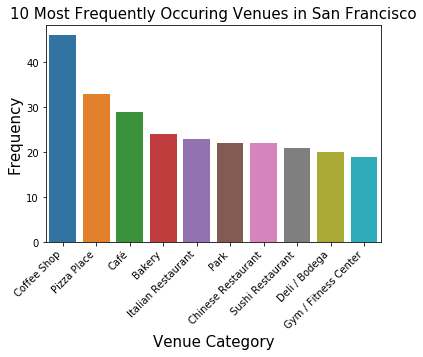

<Figure size 1296x504 with 0 Axes>

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=sf_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in San Francisco', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

#### **Top 5 Neighborhood for Coffee Shop in San Francisco**

In [27]:
sf_coffee = sf_venues[sf_venues['Venue Category'].str.contains('Coffee Shop')].reset_index(drop=True)
sf_coffee5=sf_coffee['Neighborhood'].value_counts()
sf_coffee5

North Beach/Chinatown                      7
South of Market                            7
Hayes Valley/Tenderloin/North of Market    5
Polk/Russian Hill (Nob Hill)               5
Chinatown                                  4
Inner Mission/Bernal Heights               3
Potrero Hill                               3
Sunset                                     3
Inner Richmond                             2
Castro/Noe Valley                          2
Haight-Ashbury                             1
Ingelside-Excelsior/Crocker-Amazon         1
Marina                                     1
Lake Merced                                1
Twin Peaks-Glen Park                       1
Name: Neighborhood, dtype: int64

In [28]:
sf_coffee6=sf_coffee5.nlargest(5).to_frame(name='Frequency')
sf_coffee6=sf_coffee6.reset_index()
sf_coffee6.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
sf_coffee6

,Neighborhood,Frequency
0,North Beach/Chinatown,7
1,South of Market,7
2,Hayes Valley/Tenderloin/North of Market,5
3,Polk/Russian Hill (Nob Hill),5
4,Chinatown,4


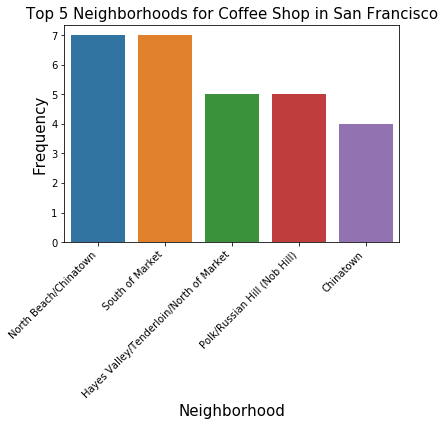

<Figure size 1296x504 with 0 Axes>

In [29]:
s=sns.barplot(x="Neighborhood", y="Frequency", data=sf_coffee6)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 5 Neighborhoods for Coffee Shop in San Francisco', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues4.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

#### **Top 5 Neighborhood for Cafe in San Francisco**

In [30]:
sf_cafe = sf_venues[sf_venues['Venue Category'].str.contains('Café')].reset_index(drop=True)
sf_cafe1= sf_cafe['Neighborhood'].value_counts()
sf_cafe1

North Beach/Chinatown                      6
Hayes Valley/Tenderloin/North of Market    3
South of Market                            3
Chinatown                                  3
Western Addition/Japantown                 3
Parkside/Forest Hill                       3
Outer Richmond                             2
Inner Richmond                             2
Polk/Russian Hill (Nob Hill)               1
Potrero Hill                               1
Castro/Noe Valley                          1
Lake Merced                                1
Name: Neighborhood, dtype: int64

In [31]:
sf_cafe2=sf_cafe1.nlargest(5).to_frame(name='Frequency')
sf_cafe2=sf_cafe2.reset_index()
sf_cafe2.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
sf_cafe2

,Neighborhood,Frequency
0,North Beach/Chinatown,6
1,Hayes Valley/Tenderloin/North of Market,3
2,South of Market,3
3,Chinatown,3
4,Western Addition/Japantown,3


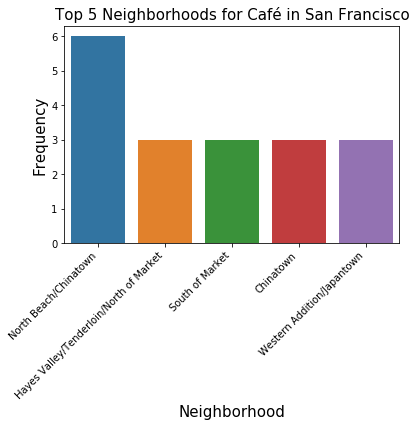

<Figure size 1296x504 with 0 Axes>

In [32]:
s=sns.barplot(x="Neighborhood", y="Frequency", data=sf_cafe2)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 5 Neighborhoods for Café in San Francisco', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues4.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

#### **Top 5 Neighborhood for Pizza in San Francisco**

In [33]:
sf_pizza = sf_venues[sf_venues['Venue Category'].str.contains('Pizza Place')].reset_index(drop=True)
sf_pizza1=sf_pizza['Neighborhood'].value_counts()
sf_pizza1

North Beach/Chinatown                 7
Inner Richmond                        5
Western Addition/Japantown            3
Inner Mission/Bernal Heights          3
Outer Richmond                        3
Ingelside-Excelsior/Crocker-Amazon    2
Parkside/Forest Hill                  2
Polk/Russian Hill (Nob Hill)          2
Haight-Ashbury                        1
Marina                                1
Chinatown                             1
Sunset                                1
South of Market                       1
Lake Merced                           1
Name: Neighborhood, dtype: int64

In [34]:
sf_pizza2=sf_pizza1.nlargest(5).to_frame(name='Frequency')
sf_pizza2=sf_pizza2.reset_index()
sf_pizza2.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
sf_pizza2

,Neighborhood,Frequency
0,North Beach/Chinatown,7
1,Inner Richmond,5
2,Western Addition/Japantown,3
3,Inner Mission/Bernal Heights,3
4,Outer Richmond,3


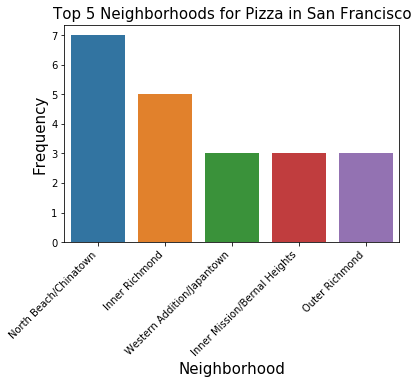

<Figure size 1296x504 with 0 Axes>

In [35]:
s=sns.barplot(x="Neighborhood", y="Frequency", data=sf_pizza2)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 5 Neighborhoods for Pizza in San Francisco', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues4.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [36]:
sf_group=sf_venues.groupby('Neighborhood').count()
sf_group
sf_group=sf_group.reset_index()
sf_group.rename(index=str, columns={"Neighborhood": "Neighborhood", "Neighborhood Latitude": "Neighborhood Latitude","Neighborhood Longitude":"Neighborhood Longitude",\
                                  "Venue":"Venue","Venue Latitude":"Venue Latitude","Venue Longitude":"Venue Longitude","Venue Category":"Venue Category" }, inplace=True)
sf_group

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayview-Hunters Point,1,1,1,1,1,1
1,Castro/Noe Valley,43,43,43,43,43,43
2,Chinatown,82,82,82,82,82,82
3,Haight-Ashbury,39,39,39,39,39,39
4,Hayes Valley/Tenderloin/North of Market,72,72,72,72,72,72
5,Ingelside-Excelsior/Crocker-Amazon,35,35,35,35,35,35
6,Inner Mission/Bernal Heights,49,49,49,49,49,49
7,Inner Richmond,84,84,84,84,84,84
8,Lake Merced,17,17,17,17,17,17
9,Marina,100,100,100,100,100,100


In [37]:
sf_group.shape

(21, 7)

In [38]:
sf_group.sort_values(by=['Venue Category'],ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
20,Western Addition/Japantown,100,100,100,100,100,100
9,Marina,100,100,100,100,100,100
15,South of Market,100,100,100,100,100,100
10,North Beach/Chinatown,92,92,92,92,92,92
7,Inner Richmond,84,84,84,84,84,84
2,Chinatown,82,82,82,82,82,82
13,Polk/Russian Hill (Nob Hill),77,77,77,77,77,77
4,Hayes Valley/Tenderloin/North of Market,72,72,72,72,72,72
6,Inner Mission/Bernal Heights,49,49,49,49,49,49
12,Parkside/Forest Hill,46,46,46,46,46,46


In [39]:
sf_mostvisit5 = pd.DataFrame({
    'Neighborhood': ['Western Addition/Japantown', 'South of Market', 'Marina','North Beach/Chinatown', 'Chinatown'],
    'Frequency': [100, 100, 100, 93, 82]
})
sf_mostvisit5

,Neighborhood,Frequency
0,Western Addition/Japantown,100
1,South of Market,100
2,Marina,100
3,North Beach/Chinatown,93
4,Chinatown,82


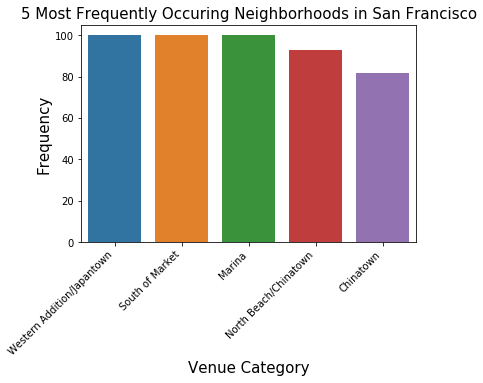

<Figure size 1296x504 with 0 Axes>

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Neighborhood", y="Frequency", data=sf_mostvisit5)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('5 Most Frequently Occuring Neighborhoods in San Francisco', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

### **Explore the Restaurants in San Francisco** 

In [41]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 
sf_restaurant = sf_venues[sf_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
sf_restaurant.index = np.arange(1, len(sf_restaurant )+1)

In [42]:
print (sf_restaurant['Venue Category'].value_counts().nlargest(10))

Italian Restaurant       23
Chinese Restaurant       22
Sushi Restaurant         21
Mexican Restaurant       15
Vietnamese Restaurant    15
American Restaurant      15
Restaurant               11
Japanese Restaurant      10
Thai Restaurant          10
Korean Restaurant         8
Name: Venue Category, dtype: int64


In [43]:
sf_res10=sf_restaurant['Venue Category'].value_counts().nlargest(10).to_frame(name='Frequency')
sf_res10=sf_res10.reset_index()
sf_res10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
sf_res10

,Venue_Category,Frequency
0,Italian Restaurant,23
1,Chinese Restaurant,22
2,Sushi Restaurant,21
3,Mexican Restaurant,15
4,Vietnamese Restaurant,15
5,American Restaurant,15
6,Restaurant,11
7,Japanese Restaurant,10
8,Thai Restaurant,10
9,Korean Restaurant,8


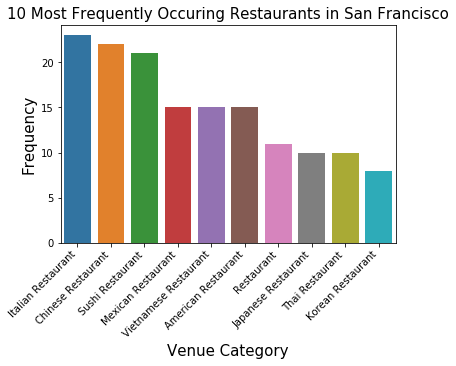

<Figure size 1296x504 with 0 Axes>

In [44]:
s=sns.barplot(x="Venue_Category", y="Frequency", data=sf_res10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurants in San Francisco', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues2.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [106]:
sf_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Ananda Fuara,37.777693,-122.416353,Vegetarian / Vegan Restaurant
2,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Golden Era Vegan,37.781495,-122.416822,Vegetarian / Vegan Restaurant
3,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Morty's Delicatessen,37.781710,-122.415243,American Restaurant
4,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Villon,37.780865,-122.412471,French Restaurant
5,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,Azalina's,37.776370,-122.416945,Malay Restaurant


In [100]:
# one hot encoding
sf_onehot = pd.get_dummies(sf_restaurant[['Venue Category']], prefix="", prefix_sep="")
sf_onehot.insert(loc=0, column='Neighborhood', value=sf_restaurant['Neighborhood'] )
sf_onehot.shape

(241, 47)

In [101]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Burmese Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Greek Restaurant,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Castro/Noe Valley,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000
1,Chinatown,0.000000,0.142857,0.000000,0.000000,0.095238,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.142857,0.047619,0.000000,0.0,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619
2,Haight-Ashbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,Hayes Valley/Tenderloin/North of Market,0.000000,0.153846,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.0,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.153846,0.076923
4,Ingelside-Excelsior/Crocker-Amazon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.071429,0.0,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.142857
5,Inner Mission/Bernal Heights,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.200000,0.100000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Inner Richmond,0.000000,0.000000,0.000000,0.068966,0.000000,0.000000,0.206897,0.000000,0.000000,0.000000,0.068966,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483,0.068966,0.000000,0.103448,0.0,0.103448,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.0,0.034483,0.000000,0.137931,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483
7,Lake Merced,0.000000,0.000000,0.000000,0.00000

#### **Output each neighborhood along with the top 5 most common restuarants**

In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [109]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Castro/Noe Valley,Thai Restaurant,Seafood Restaurant,Szechuan Restaurant,Japanese Restaurant,American Restaurant
1,Chinatown,American Restaurant,Italian Restaurant,Sushi Restaurant,Cantonese Restaurant,Vietnamese Restaurant
2,Haight-Ashbury,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Filipino Restaurant,Jewish Restaurant,Japanese Restaurant
3,Hayes Valley/Tenderloin/North of Market,American Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Southern / Soul Food Restaurant,Malay Restaurant
4,Ingelside-Excelsior/Crocker-Amazon,Vietnamese Restaurant,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Thai Restaurant
5,Inner Mission/Bernal Heights,Mexican Restaurant,New American Restaurant,American Restaurant,Indian Restaurant,Chinese Restaurant
6,Inner Richmond,Chinese Restaurant,Sushi Restaurant,Korean Restaurant,Japanese Restaurant,Fast Food Restaurant
7,Lake Merced,Mexican Restaurant,Vietnamese Restaurant,Filipino Restaurant,Japanese Restaurant,Japanese Curry Restaurant
8,Marina,Italian Restaurant,French Restaurant,Mexican Restaurant,American Restaurant,Vegetarian / Vegan Restaurant
9,North Beach/Chinatown,Italian Restaurant,Chinese Restaurant,Sushi Restaurant,Mexican Restaurant,Latin American Restaurant


#### **Cluster Neighborhoods**

In [110]:
# set number of clusters
kclusters = 5

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 0, 0, 0, 0, 2, 0, 0], dtype=int32)

In [113]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sf_merged = df2
sf_merged = sf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
sf_merged

,zipcode,Neighborhood,latitude,longitude,city,state,county,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,94102,Hayes Valley/Tenderloin/North of Market,37.779278,-122.416582,San Francisco,CA,San Francisco,0.0,American Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Southern / Soul Food Restaurant,Malay Restaurant
1,94103,South of Market,37.775678,-122.412131,San Francisco,CA,San Francisco,0.0,Restaurant,Thai Restaurant,Ethiopian Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant
2,94107,Potrero Hill,37.769029,-122.393681,San Francisco,CA,San Francisco,4.0,Mediterranean Restaurant,Dumpling Restaurant,Vietnamese Restaurant,Filipino Restaurant,Japanese Restaurant
3,94108,Chinatown,37.791028,-122.408782,San Francisco,CA,San Francisco,0.0,American Restaurant,Italian Restaurant,Sushi Restaurant,Cantonese Restaurant,Vietnamese Restaurant
4,94109,Polk/Russian Hill (Nob Hill),37.795219,-122.420782,San Francisco,CA,San Francisco,0.0,Italian Restaurant,Sushi Restaurant,Vietnamese Restaurant,American Restaurant,Seafood Restaurant
5,94110,Inner Mission/Bernal Heights,37.748932,-122.416281,San Francisco,CA,San Francisco,0.0,Mexican Restaurant,New American Restaurant,American Restaurant,Indian Restaurant,Chinese Restaurant
6,94112,Ingelside-Excelsior/Crocker-Amazon,37.721981,-122.439382,San Francisco,CA,San Francisco,0.0,Vietnamese Restaurant,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Thai Restaurant
7,94114,Castro/Noe Valley,37.758279,-122.439332,San Francisco,CA,San Francisco,0.0,Thai Restaurant,Seafood Restaurant,Szechuan Restaurant,Japanese Restaurant,American Restaurant
8,94115,Western Addition/Japantown,37.786028,-122.437032,San Francisco,CA,San Francisco,0.0,Vietnamese Restaurant,American Restaurant,New American Restaurant,Sushi Restaurant,Asian Restaurant
9,94116,Parkside/Forest Hill,37.743857,-122.483232,San Francisco,CA,San Francisco,0.0,Chinese Restaurant,Dumpling Restaurant,Vietnamese Restaurant,American Restaurant,Japanese Restaurant


In [115]:
df3=pd.merge(neighborhoods_venues_sorted,df2, on="Neighborhood")
df3

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,zipcode,latitude,longitude,city,state,county
0,0,Castro/Noe Valley,Thai Restaurant,Seafood Restaurant,Szechuan Restaurant,Japanese Restaurant,American Restaurant,94114,37.758279,-122.439332,San Francisco,CA,San Francisco
1,0,Chinatown,American Restaurant,Italian Restaurant,Sushi Restaurant,Cantonese Restaurant,Vietnamese Restaurant,94108,37.791028,-122.408782,San Francisco,CA,San Francisco
2,3,Haight-Ashbury,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Filipino Restaurant,Jewish Restaurant,Japanese Restaurant,94117,37.769079,-122.443882,San Francisco,CA,San Francisco
3,0,Hayes Valley/Tenderloin/North of Market,American Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Southern / Soul Food Restaurant,Malay Restaurant,94102,37.779278,-122.416582,San Francisco,CA,San Francisco
4,0,Ingelside-Excelsior/Crocker-Amazon,Vietnamese Restaurant,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Thai Restaurant,94112,37.721981,-122.439382,San Francisco,CA,San Francisco
5,0,Inner Mission/Bernal Heights,Mexican Restaurant,New American Restaurant,American Restaurant,Indian Restaurant,Chinese Restaurant,94110,37.748932,-122.416281,San Francisco,CA,San Francisco
6,0,Inner Richmond,Chinese Restaurant,Sushi Restaurant,Korean Restaurant,Japanese Restaurant,Fast Food Restaurant,94118,37.778779,-122.459982,San Francisco,CA,San Francisco
7,2,Lake Merced,Mexican Restaurant,Vietnamese Restaurant,Filipino Restaurant,Japanese Restaurant,Japanese Curry Restaurant,94132,37.722631,-122.482483,San Francisco,CA,San Francisco
8,0,Marina,Italian Restaurant,French Restaurant,Mexican Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,94123,37.799670,-122.435732,San Francisco,CA,San Francisco
9,0,North Beach/Chinatown,Italian Restaurant,Chinese Restaurant,Sushi Restaurant,Mexican Restaurant,Latin American Restaurant,94133,37.801928,-122.410182,San Francisco,CA,San Francisco


In [128]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df3['latitude'], df3['longitude'], df3['Neighborhood'], df3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters